# 数据获取与数据清洗

In [1]:
# 导入包
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# 读入数据

data = pd.read_csv('X:\ml_test\WIND/123002.SZ/market.csv',
                   encoding='gbk')  # 读取csv文件


In [3]:
# 数据分割

def data_cut(data):
    time = data.iloc[:, [3]].values  # 时间
    # 1.盘前数据
    i = j = k = 90000000
    for i in range(len(time)):
        if time[i] > 92500000:
            pre_data = data.iloc[0:i, :]
            pre_time = time[0:i]
            break

    # 2.早盘盘中数据
    for j in range(i, len(time)):
        if time[j] > 120000000:
            mor_data = data.iloc[i:j, :]
            mor_time = time[i:j]
            break

    # 3.午盘盘中数据
    for k in range(j, len(time)):
        if time[k] > 145700000:
            noon_data = data.iloc[j:k, :]
            noon_time = time[j:k]
            break

    # 4.尾盘数据
    post_data = data.iloc[k:, :]
    post_time = time[k:]
    print("盘前数据：", pre_data.shape)
    print("早盘盘中数据：", mor_data.shape)
    print("午盘盘中数据：", noon_data.shape)
    print("尾盘数据：", post_data.shape)
    print("总数据：", data.shape)

    return time, pre_data, mor_data, noon_data, post_data, pre_time, mor_time, noon_time, post_time

time, pre_data, mor_data, noon_data, post_data, pre_time, mor_time, noon_time, post_time = data_cut(
    data)


盘前数据： (16, 67)
早盘盘中数据： (1006, 67)
午盘盘中数据： (457, 67)
尾盘数据： (10, 67)
总数据： (1489, 67)


In [4]:
# 读取各项指标

def get_basic_data(data):

    tran_price = data.iloc[:, [4]].values  # 成交价

    tran_amount = data.iloc[:, [5]].values  # 成交量

    vol_of_tran = data.iloc[:, [6]].values  # 成交额

    num_of_tran = data.iloc[:, [7]].values  # 成交笔数

    cum_day_amount = data.iloc[:, [11]].values  # 当日累计成交量

    cum_day_vol = data.iloc[:, [12]].values  # 当日累计成交额

    ceiling_price = data.iloc[:, [13]].values  # 最高限价

    floor_price = data.iloc[:, [14]].values  # 最低限价

    open_price = data.iloc[-1, 14]  # 开盘价

    pre_closing = data.iloc[-1, 14]  # 前收盘

    closing = data.iloc[-1, 4]  # 今收盘

    wei_aveg_bidp = data.iloc[:, [57]].values  # 加权平均叫卖价

    wei_aveg_askp = data.iloc[:, [58]].values  # 加权平均叫买价

    tot_bidp = data.iloc[:, [59]].values  # 叫卖总量

    tot_askp = data.iloc[:, [60]].values  # 叫买总量

    return tran_price, tran_amount, vol_of_tran, num_of_tran, cum_day_amount, cum_day_vol, ceiling_price, floor_price, open_price, pre_closing, closing, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp


tran_price, tran_amount, vol_of_tran, num_of_tran, cum_day_amount, cum_day_vol, ceiling_price, floor_price, open_price, pre_closing, closing, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp = get_basic_data(
    data)


In [5]:
# 读取各项指标

def get_basic_data(data):

    tran_price = data.iloc[:, [4]].values  # 成交价

    tran_amount = data.iloc[:, [5]].values  # 成交量

    vol_of_tran = data.iloc[:, [6]].values  # 成交额

    num_of_tran = data.iloc[:, [7]].values  # 成交笔数

    cum_day_amount = data.iloc[:, [11]].values  # 当日累计成交量

    cum_day_vol = data.iloc[:, [12]].values  # 当日累计成交额

    ceiling_price = data.iloc[:, [13]].values  # 最高限价

    floor_price = data.iloc[:, [14]].values  # 最低限价

    wei_aveg_bidp = data.iloc[:, [57]].values  # 加权平均叫卖价

    wei_aveg_askp = data.iloc[:, [58]].values  # 加权平均叫买价

    tot_bidp = data.iloc[:, [59]].values  # 叫卖总量

    tot_askp = data.iloc[:, [60]].values  # 叫买总量

    return tran_price, tran_amount, vol_of_tran, num_of_tran, cum_day_amount, cum_day_vol, ceiling_price, floor_price, open_price, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp

pre_tran_price, pre_tran_amount, pre_vol_of_tran, pre_num_of_tran, pre_cum_day_amount, pre_cum_day_vol, pre_ceiling_price, pre_floor_price, pre_open_price, pre_wei_aveg_bidp, pre_wei_aveg_askp, pre_tot_bidp, pre_tot_askp = get_basic_data(
    pre_data)
mor_tran_price, mor_tran_amount, mor_vol_of_tran, mor_num_of_tran, mor_cum_day_amount, mor_cum_day_vol, mor_ceiling_price, mor_floor_price, mor_open_price, mor_wei_aveg_bidp, mor_wei_aveg_askp, mor_tot_bidp, mor_tot_askp = get_basic_data(
    mor_data)
noon_tran_price, noon_tran_amount, noon_vol_of_tran, noon_num_of_tran, noon_cum_day_amount, noon_cum_day_vol, noon_ceiling_price, noon_floor_price, noon_open_price, noon_wei_aveg_bidp, noon_wei_aveg_askp, noon_tot_bidp, noon_tot_askp = get_basic_data(
    noon_data)
post_tran_price, post_tran_amount, post_vol_of_tran, post_num_of_tran, post_cum_day_amount, post_cum_day_vol, post_ceiling_price, post_floor_price, post_open_price, post_wei_aveg_bidp, post_wei_aveg_askp, post_tot_bidp, post_tot_askp = get_basic_data(
    post_data)


In [6]:
# 当日交易情况

def getandwrite_today_data(open_price, pre_closing, closing, num_of_tran, cum_day_amount, cum_day_vol, ceiling_price, floor_price, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp):
    print("开盘价：", end='')
    print(open_price)
    print("前收盘：", end='')
    print(pre_closing)
    print("今收盘：", end='')
    print(closing)

    print("当日总成交笔数：", end='')
    print(num_of_tran[-1][0])
    print("当日总成交量：", end='')
    print(cum_day_amount[-1][0])
    print("当日总成交额：", end='')
    print(cum_day_vol[-1][0])

    print("当日最高限价：", end='')
    print(ceiling_price[-1][0])
    print("当日最低限价：", end='')
    print(floor_price[-1][0])

    print("当日加权平均叫卖价：", end='')
    print(wei_aveg_bidp[-1][0])
    print("当日加权平均叫买价：", end='')
    print(wei_aveg_askp[-1][0])

    print("当日叫卖总量：", end='')
    print(tot_bidp[-1][0])
    print("当日叫买总量：", end='')
    print(tot_askp[-1][0])

    import csv
# write data to csv file
    with open("./daily_data.csv", "w") as csvfile:
        writer = csv.writer(csvfile)
        # 先写入columns_name
        writer.writerow(['当日总成交笔数', '当日总成交量', '当日总成交额', '当日最高限价',
                         '当日最低限价', '当日加权平均叫卖价', '当日加权平均叫买价', '当日叫卖总量', '当日叫买总量'])
        # 写入多行用writerows
        writer.writerows([[num_of_tran[-1][0], cum_day_amount[-1][0], cum_day_vol[-1][0], ceiling_price[-1][0],
                         floor_price[-1][0], wei_aveg_bidp[-1][0], wei_aveg_askp[-1][0], tot_bidp[-1][0], tot_askp[-1][0]]])


getandwrite_today_data(open_price, pre_closing, closing, num_of_tran, cum_day_amount,
                       cum_day_vol, ceiling_price, floor_price, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp)


开盘价：1174100
前收盘：1174100
今收盘：1178360
当日总成交笔数：612
当日总成交量：19840
当日总成交额：2341959
当日最高限价：1188280
当日最低限价：1174100
当日加权平均叫卖价：1233810
当日加权平均叫买价：1171530
当日叫卖总量：21040
当日叫买总量：4320


In [7]:
# 十档申买与申卖数据

def get_bidandask_data(data):
    bid_price_1 = data.iloc[:, [17]].values  # 申卖价1
    bid_price_2 = data.iloc[:, [18]].values  # 申卖价2
    bid_price_3 = data.iloc[:, [19]].values  # 申卖价3
    bid_price_4 = data.iloc[:, [20]].values  # 申卖价4
    bid_price_5 = data.iloc[:, [21]].values  # 申卖价5
    bid_price_6 = data.iloc[:, [22]].values  # 申卖价6
    bid_price_7 = data.iloc[:, [23]].values  # 申卖价7
    bid_price_8 = data.iloc[:, [24]].values  # 申卖价8
    bid_price_9 = data.iloc[:, [25]].values  # 申卖价9
    bid_price_10 = data.iloc[:, [26]].values  # 申卖价10

    bid_amount_1 = data.iloc[:, [27]].values  # 申卖量1
    bid_amount_2 = data.iloc[:, [28]].values  # 申卖量2
    bid_amount_3 = data.iloc[:, [29]].values  # 申卖量3
    bid_amount_4 = data.iloc[:, [30]].values  # 申卖量4
    bid_amount_5 = data.iloc[:, [31]].values  # 申卖量5
    bid_amount_6 = data.iloc[:, [32]].values  # 申卖量6
    bid_amount_7 = data.iloc[:, [33]].values  # 申卖量7
    bid_amount_8 = data.iloc[:, [34]].values  # 申卖量8
    bid_amount_9 = data.iloc[:, [35]].values  # 申卖量9
    bid_amount_10 = data.iloc[:, [36]].values  # 申卖量10

    ask_price_1 = data.iloc[:, [37]].values  # 申买价1
    ask_price_2 = data.iloc[:, [38]].values  # 申买价2
    ask_price_3 = data.iloc[:, [39]].values  # 申买价3
    ask_price_4 = data.iloc[:, [40]].values  # 申买价4
    ask_price_5 = data.iloc[:, [41]].values  # 申买价5
    ask_price_6 = data.iloc[:, [42]].values  # 申买价6
    ask_price_7 = data.iloc[:, [43]].values  # 申买价7
    ask_price_8 = data.iloc[:, [44]].values  # 申买价8
    ask_price_9 = data.iloc[:, [45]].values  # 申买价9
    ask_price_10 = data.iloc[:, [46]].values  # 申买价10

    ask_amount_1 = data.iloc[:, [47]].values  # 申买量1
    ask_amount_2 = data.iloc[:, [48]].values  # 申买量2
    ask_amount_3 = data.iloc[:, [49]].values  # 申买量3
    ask_amount_4 = data.iloc[:, [50]].values  # 申买量4
    ask_amount_5 = data.iloc[:, [51]].values  # 申买量5
    ask_amount_6 = data.iloc[:, [52]].values  # 申买量6
    ask_amount_7 = data.iloc[:, [53]].values  # 申买量7
    ask_amount_8 = data.iloc[:, [54]].values  # 申买量8
    ask_amount_9 = data.iloc[:, [55]].values  # 申买量9
    ask_amount_10 = data.iloc[:, [56]].values  # 申买量10

    return (bid_price_1, bid_price_2, bid_price_3, bid_price_4, bid_price_5, bid_price_6, bid_price_7, bid_price_8, bid_price_9, bid_price_10,
            bid_amount_1, bid_amount_2, bid_amount_3, bid_amount_4, bid_amount_5, bid_amount_6, bid_amount_7, bid_amount_8, bid_amount_9, bid_amount_10,
            ask_price_1, ask_price_2, ask_price_3, ask_price_4, ask_price_5, ask_price_6, ask_price_7, ask_price_8, ask_price_9, ask_price_10,
            ask_amount_1, ask_amount_2, ask_amount_3, ask_amount_4, ask_amount_5, ask_amount_6, ask_amount_7, ask_amount_8, ask_amount_9, ask_amount_10)


# 十档申买与申卖数据分割
pre_bid_price_1, pre_bid_price_2, pre_bid_price_3, pre_bid_price_4, pre_bid_price_5, pre_bid_price_6, pre_bid_price_7, pre_bid_price_8, pre_bid_price_9, pre_bid_price_10, \
    pre_bid_amount_1, pre_bid_amount_2, pre_bid_amount_3, pre_bid_amount_4, pre_bid_amount_5, pre_bid_amount_6, pre_bid_amount_7, pre_bid_amount_8, pre_bid_amount_9, pre_bid_amount_10, \
    pre_ask_price_1, pre_ask_price_2, pre_ask_price_3, pre_ask_price_4, pre_ask_price_5, pre_ask_price_6, pre_ask_price_7, pre_ask_price_8, pre_ask_price_9, pre_ask_price_10, \
    pre_ask_amount_1, pre_ask_amount_2, pre_ask_amount_3, pre_ask_amount_4, pre_ask_amount_5, pre_ask_amount_6, pre_ask_amount_7, pre_ask_amount_8, pre_ask_amount_9, pre_ask_amount_10 = get_bidandask_data(
        pre_data)

mor_bid_price_1, mor_bid_price_2, mor_bid_price_3, mor_bid_price_4, mor_bid_price_5, mor_bid_price_6, mor_bid_price_7, mor_bid_price_8, mor_bid_price_9, mor_bid_price_10, \
    mor_bid_amount_1, mor_bid_amount_2, mor_bid_amount_3, mor_bid_amount_4, mor_bid_amount_5, mor_bid_amount_6, mor_bid_amount_7, mor_bid_amount_8, mor_bid_amount_9, mor_bid_amount_10, \
    mor_ask_price_1, mor_ask_price_2, mor_ask_price_3, mor_ask_price_4, mor_ask_price_5, mor_ask_price_6, mor_ask_price_7, mor_ask_price_8, mor_ask_price_9, mor_ask_price_10, \
    mor_ask_amount_1, mor_ask_amount_2, mor_ask_amount_3, mor_ask_amount_4, mor_ask_amount_5, mor_ask_amount_6, mor_ask_amount_7, mor_ask_amount_8, mor_ask_amount_9, mor_ask_amount_10 = get_bidandask_data(
        mor_data)

noon_bid_price_1, noon_bid_price_2, noon_bid_price_3, noon_bid_price_4, noon_bid_price_5, noon_bid_price_6, noon_bid_price_7, noon_bid_price_8, noon_bid_price_9, noon_bid_price_10, \
    noon_bid_amount_1, noon_bid_amount_2, noon_bid_amount_3, noon_bid_amount_4, noon_bid_amount_5, noon_bid_amount_6, noon_bid_amount_7, noon_bid_amount_8, noon_bid_amount_9, noon_bid_amount_10, \
    noon_ask_price_1, noon_ask_price_2, noon_ask_price_3, noon_ask_price_4, noon_ask_price_5, noon_ask_price_6, noon_ask_price_7, noon_ask_price_8, noon_ask_price_9, noon_ask_price_10, \
    noon_ask_amount_1, noon_ask_amount_2, noon_ask_amount_3, noon_ask_amount_4, noon_ask_amount_5, noon_ask_amount_6, noon_ask_amount_7, noon_ask_amount_8, noon_ask_amount_9, noon_ask_amount_10 = get_bidandask_data(
        noon_data)

post_bid_price_1, post_bid_price_2, post_bid_price_3, post_bid_price_4, post_bid_price_5, post_bid_price_6, post_bid_price_7, post_bid_price_8, post_bid_price_9, post_bid_price_10, \
    post_bid_amount_1, post_bid_amount_2, post_bid_amount_3, post_bid_amount_4, post_bid_amount_5, post_bid_amount_6, post_bid_amount_7, post_bid_amount_8, post_bid_amount_9, post_bid_amount_10, \
    post_ask_price_1, post_ask_price_2, post_ask_price_3, post_ask_price_4, post_ask_price_5, post_ask_price_6, post_ask_price_7, post_ask_price_8, post_ask_price_9, post_ask_price_10, \
    post_ask_amount_1, post_ask_amount_2, post_ask_amount_3, post_ask_amount_4, post_ask_amount_5, post_ask_amount_6, post_ask_amount_7, post_ask_amount_8, post_ask_amount_9, post_ask_amount_10 = get_bidandask_data(
        post_data)


# 数据预处理

# 数据可视化

In [8]:
# 交易价格（平均买、平均卖、成交）可视化

def vis_tran_price(time, tran_price, wei_aveg_bidp, wei_aveg_askp):
    plt.plot(time, tran_price, label='tran_price')

    plt.plot(time, wei_aveg_bidp, label='wei_aveg_bidp')
    plt.plot(time, wei_aveg_askp, label='wei_aveg_askp')

    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()


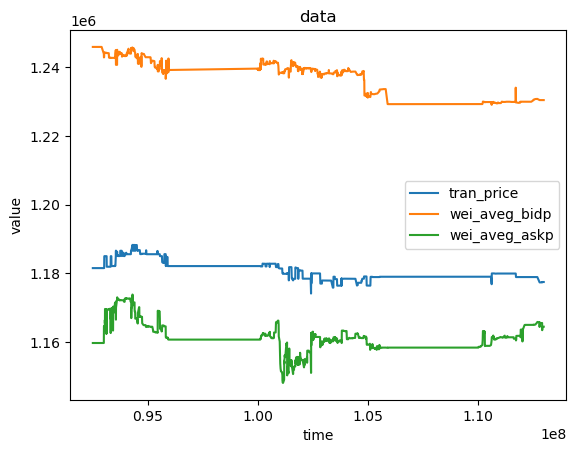

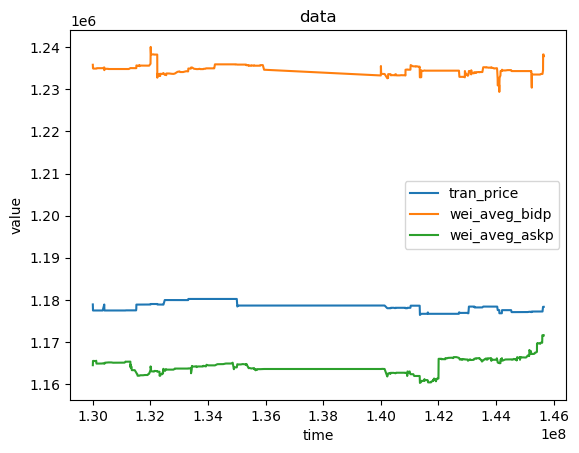

In [9]:
vis_tran_price(mor_time, mor_tran_price, mor_wei_aveg_bidp, mor_wei_aveg_askp)
vis_tran_price(noon_time, noon_tran_price, noon_wei_aveg_bidp, noon_wei_aveg_askp)


In [10]:
# 总申买、总申卖可视化

def tot_askp_bidp(time, tot_bidp, tot_askp):
    plt.plot(time, tot_bidp, label='tot_bidp')
    plt.plot(time, tot_askp, label='tot_askp')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()


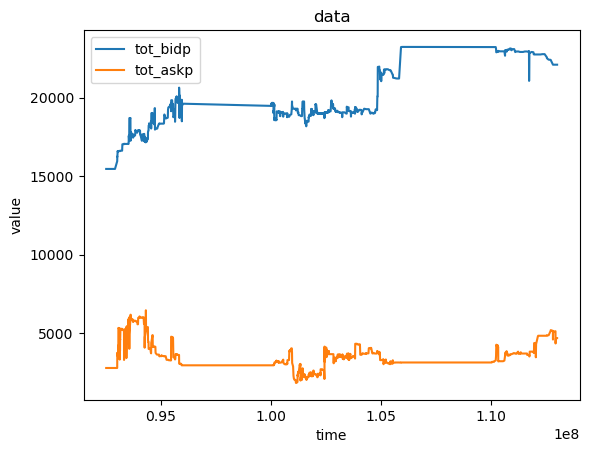

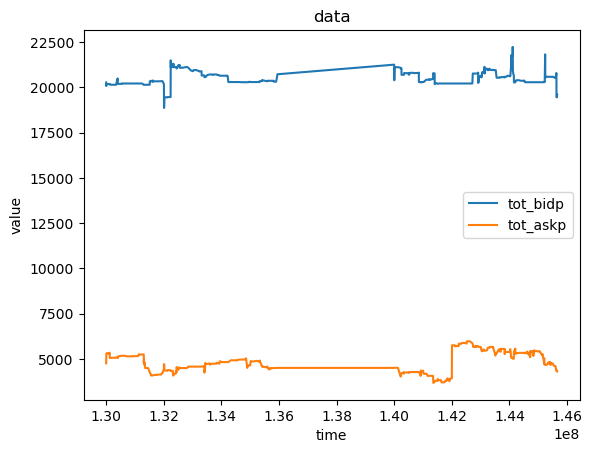

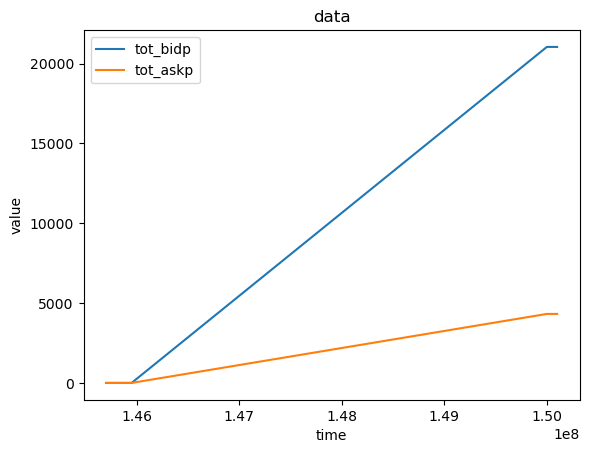

In [11]:
tot_askp_bidp(mor_time, mor_tot_bidp, mor_tot_askp)
tot_askp_bidp(noon_time, noon_tot_bidp, noon_tot_askp)
tot_askp_bidp(post_time, post_tot_bidp, post_tot_askp)


In [12]:
# 交易笔数可视化

def vis_tran_num(time, vol_of_tran):
    plt.plot(time, vol_of_tran, label='num_of_tran')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()


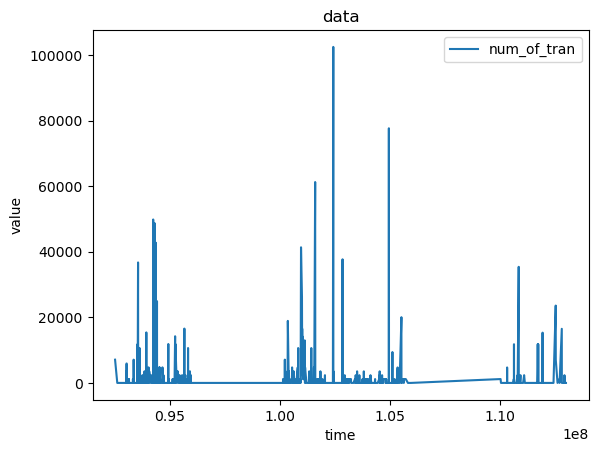

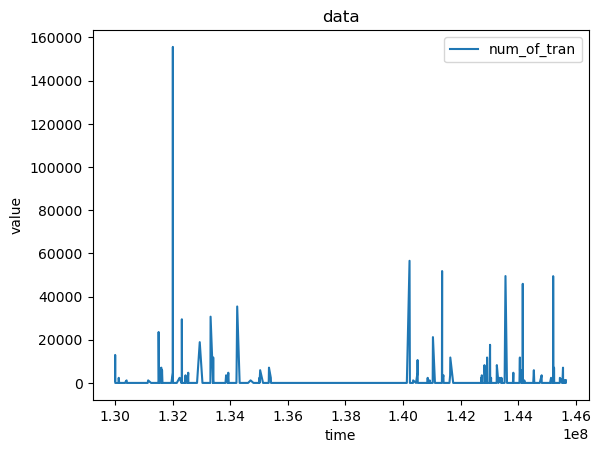

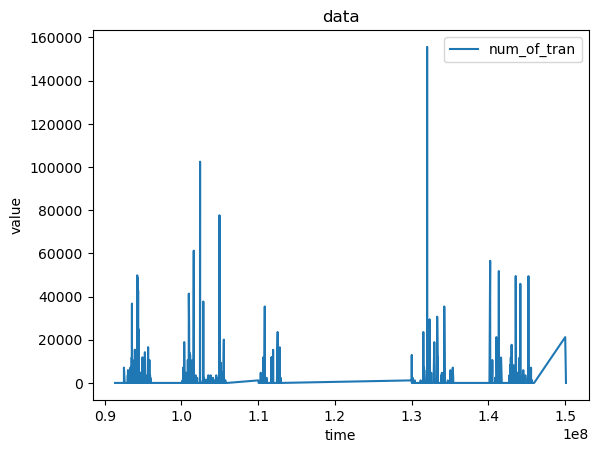

In [13]:
vis_tran_num(mor_time, mor_vol_of_tran)
vis_tran_num(noon_time, noon_vol_of_tran)

vis_tran_num(time, vol_of_tran)


In [14]:
# 交易价格可视化

def vis_tran_price(time, tran_price):
    plt.plot(time, tran_price, label='tran_price')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()


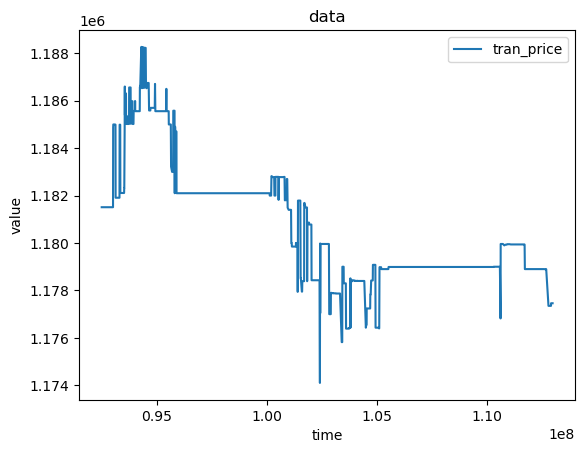

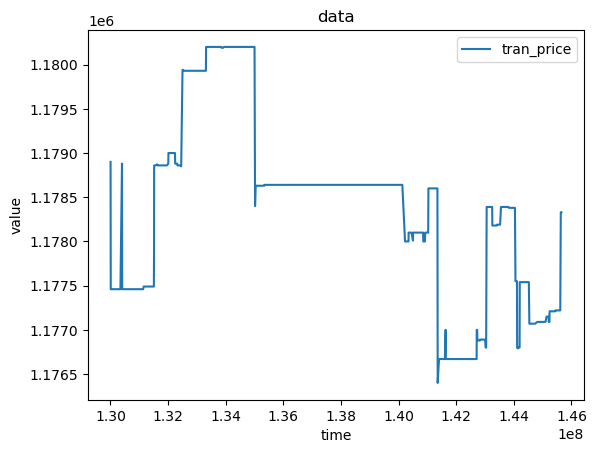

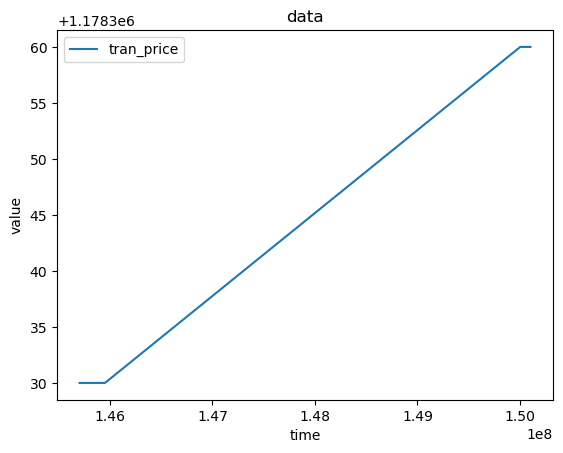

In [15]:
vis_tran_price(mor_time, mor_tran_price)
vis_tran_price(noon_time, noon_tran_price)
vis_tran_price(post_time, post_tran_price)


In [16]:
# 申买价、申卖价可视化
def vis_bidask_price(bid_price_1, bid_price_2, bid_price_3, bid_price_4, bid_price_5, bid_price_6, bid_price_7, bid_price_8, bid_price_9, bid_price_10,
                     ask_price_1, ask_price_2, ask_price_3, ask_price_4, ask_price_5, ask_price_6, ask_price_7, ask_price_8, ask_price_9, ask_price_10,
                     time):
    plt.figure(figsize=(20, 10))

    plt.plot(time, bid_price_1, label='bid_price_1')
    plt.plot(time, bid_price_2, label='bid_price_2')
    plt.plot(time, bid_price_3, label='bid_price_3')
    plt.plot(time, bid_price_4, label='bid_price_4')
    plt.plot(time, bid_price_5, label='bid_price_5')
    plt.plot(time, bid_price_6, label='bid_price_6')
    plt.plot(time, bid_price_7, label='bid_price_7')
    plt.plot(time, bid_price_8, label='bid_price_8')
    plt.plot(time, bid_price_9, label='bid_price_9')
    plt.plot(time, bid_price_10, label='bid_price_10')

    plt.plot(time, ask_price_1, label='ask_price_1')
    plt.plot(time, ask_price_2, label='ask_price_2')
    plt.plot(time, ask_price_3, label='ask_price_3')
    plt.plot(time, ask_price_4, label='ask_price_4')
    plt.plot(time, ask_price_5, label='ask_price_5')
    plt.plot(time, ask_price_6, label='ask_price_6')
    plt.plot(time, ask_price_7, label='ask_price_7')
    plt.plot(time, ask_price_8, label='ask_price_8')
    plt.plot(time, ask_price_9, label='ask_price_9')
    plt.plot(time, ask_price_10, label='ask_price_10')

    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()


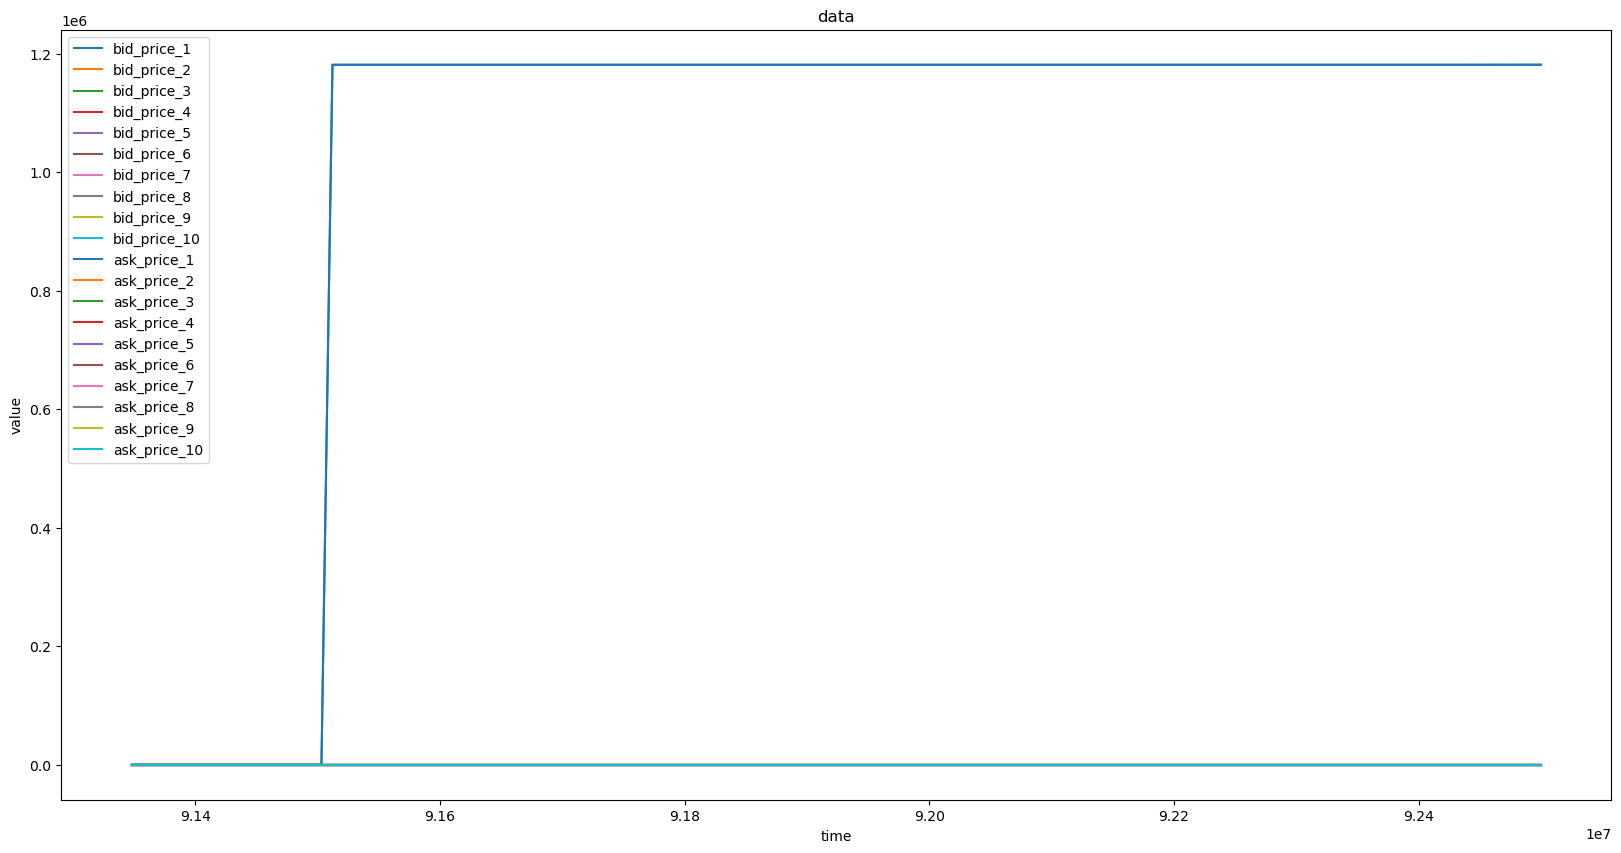

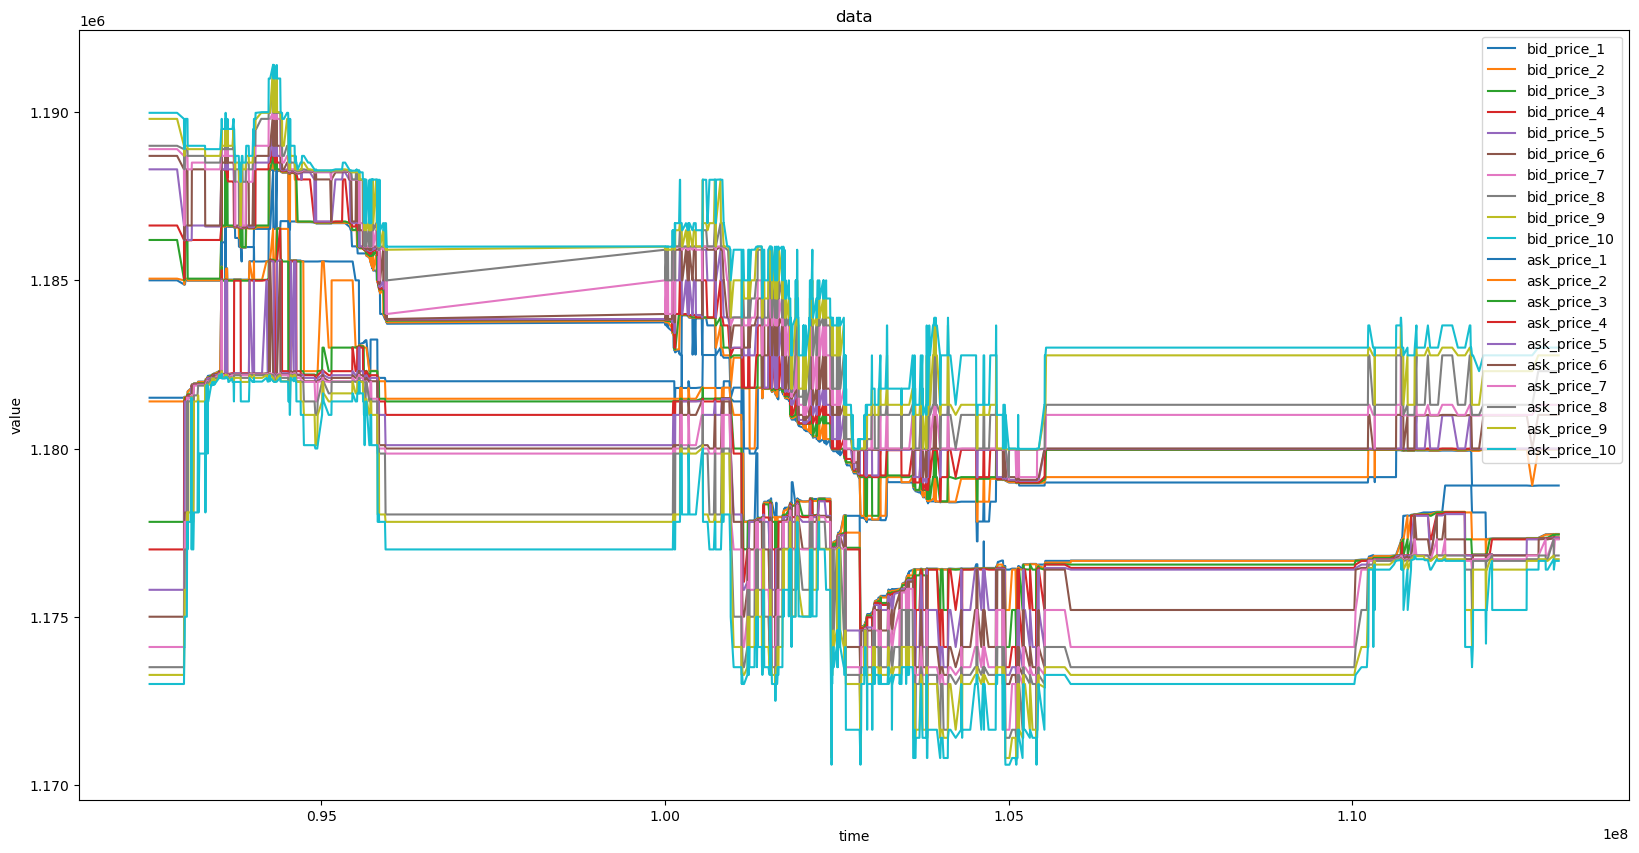

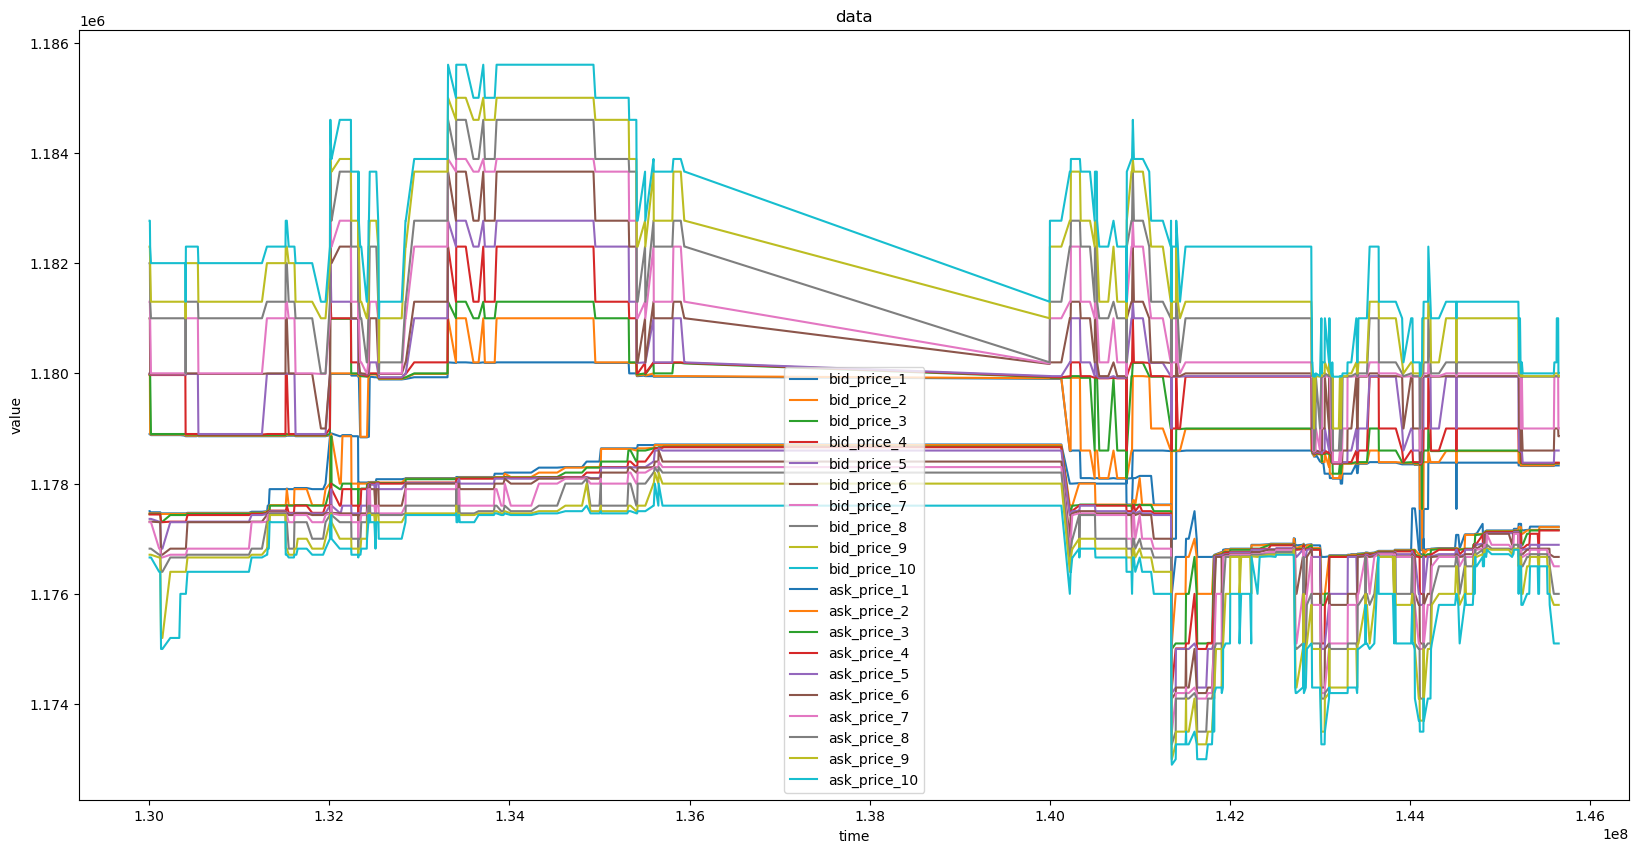

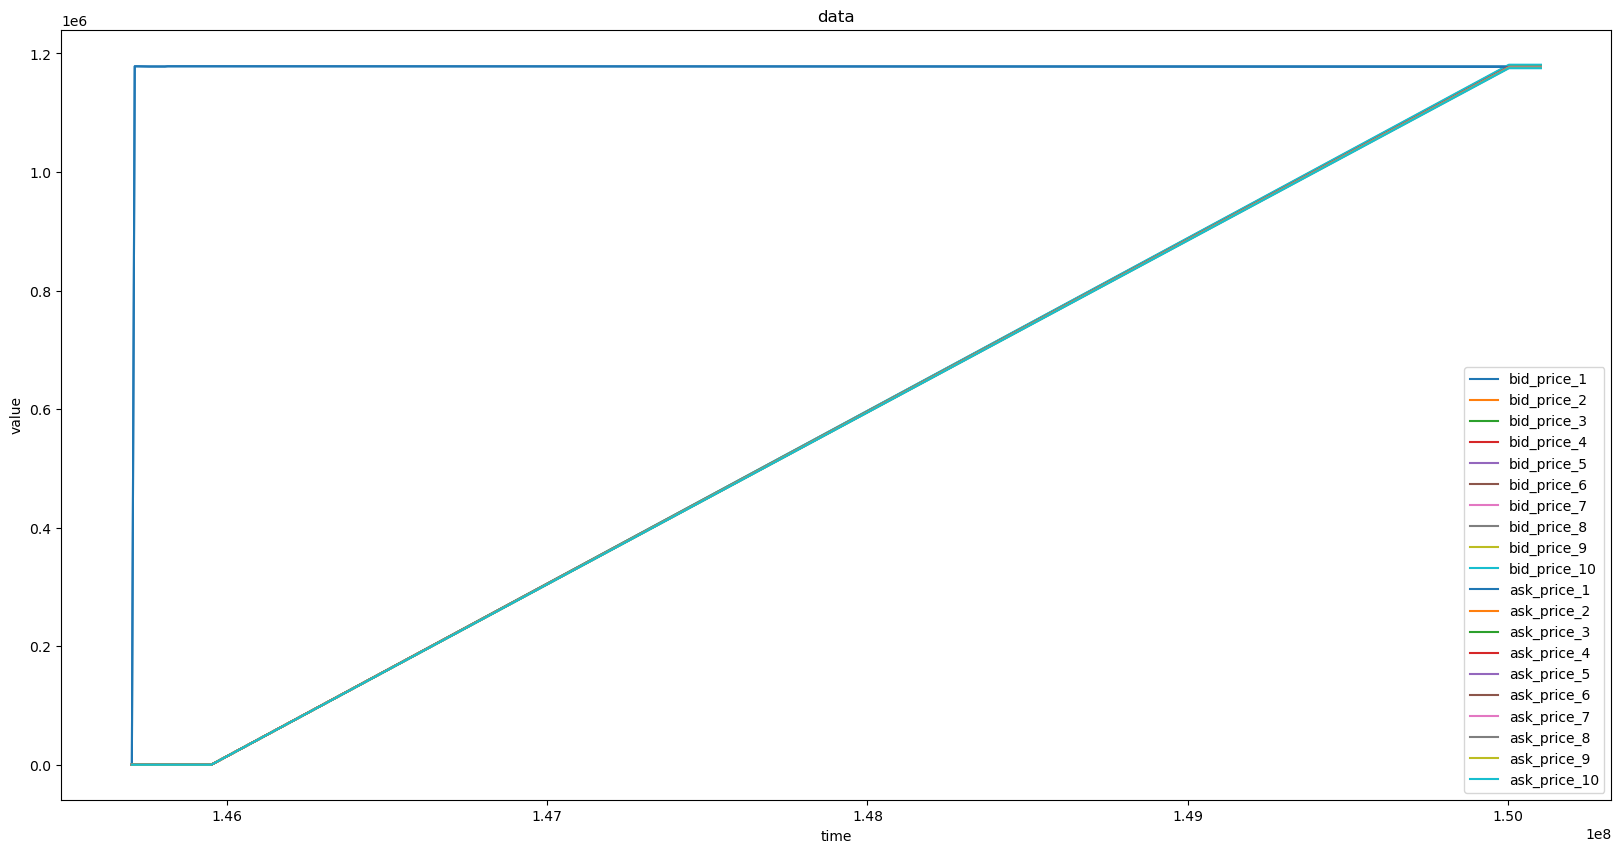

In [17]:
vis_bidask_price(pre_bid_price_1,pre_bid_price_2,pre_bid_price_3,pre_bid_price_4,pre_bid_price_5,pre_bid_price_6,pre_bid_price_7,pre_bid_price_8,pre_bid_price_9,pre_bid_price_10, \
                    pre_ask_price_1,pre_ask_price_2,pre_ask_price_3,pre_ask_price_4,pre_ask_price_5,pre_ask_price_6,pre_ask_price_7,pre_ask_price_8,pre_ask_price_9,pre_ask_price_10, \
                    pre_time)
vis_bidask_price(mor_bid_price_1,mor_bid_price_2,mor_bid_price_3,mor_bid_price_4,mor_bid_price_5,mor_bid_price_6,mor_bid_price_7,mor_bid_price_8,mor_bid_price_9,mor_bid_price_10, \
                    mor_ask_price_1,mor_ask_price_2,mor_ask_price_3,mor_ask_price_4,mor_ask_price_5,mor_ask_price_6,mor_ask_price_7,mor_ask_price_8,mor_ask_price_9,mor_ask_price_10, \
                    mor_time)
vis_bidask_price(noon_bid_price_1,noon_bid_price_2,noon_bid_price_3,noon_bid_price_4,noon_bid_price_5,noon_bid_price_6,noon_bid_price_7,noon_bid_price_8,noon_bid_price_9,noon_bid_price_10, \
                    noon_ask_price_1,noon_ask_price_2,noon_ask_price_3,noon_ask_price_4,noon_ask_price_5,noon_ask_price_6,noon_ask_price_7,noon_ask_price_8,noon_ask_price_9,noon_ask_price_10, \
                    noon_time)
vis_bidask_price(post_bid_price_1,post_bid_price_2,post_bid_price_3,post_bid_price_4,post_bid_price_5,post_bid_price_6,post_bid_price_7,post_bid_price_8,post_bid_price_9,post_bid_price_10, \
                    post_ask_price_1,post_ask_price_2,post_ask_price_3,post_ask_price_4,post_ask_price_5,post_ask_price_6,post_ask_price_7,post_ask_price_8,post_ask_price_9,post_ask_price_10, \
                        post_time)

In [18]:
#申买量、申卖量可视化
def vis_bidask_amount(bid_amount_1, bid_amount_2, bid_amount_3, bid_amount_4, bid_amount_5, bid_amount_6, bid_amount_7, bid_amount_8, bid_amount_9, bid_amount_10,
                      ask_amount_1, ask_amount_2, ask_amount_3, ask_amount_4, ask_amount_5, ask_amount_6, ask_amount_7, ask_amount_8, ask_amount_9, ask_amount_10,
                      time):
    plt.figure(figsize=(20, 10))

    plt.plot(time, ask_amount_1, label='ask_amount_1')
    plt.plot(time, ask_amount_2, label='ask_amount_2')
    plt.plot(time, ask_amount_3, label='ask_amount_3')
    plt.plot(time, ask_amount_4, label='ask_amount_4')
    plt.plot(time, ask_amount_5, label='ask_amount_5')
    plt.plot(time, ask_amount_6, label='ask_amount_6')
    plt.plot(time, ask_amount_7, label='ask_amount_7')
    plt.plot(time, ask_amount_8, label='ask_amount_8')
    plt.plot(time, ask_amount_9, label='ask_amount_9')
    plt.plot(time, ask_amount_10, label='ask_amount_10')

    plt.plot(time, bid_amount_1, label='bid_amount_1')
    plt.plot(time, bid_amount_2, label='bid_amount_2')
    plt.plot(time, bid_amount_3, label='bid_amount_3')
    plt.plot(time, bid_amount_4, label='bid_amount_4')
    plt.plot(time, bid_amount_5, label='bid_amount_5')
    plt.plot(time, bid_amount_6, label='bid_amount_6')
    plt.plot(time, bid_amount_7, label='bid_amount_7')
    plt.plot(time, bid_amount_8, label='bid_amount_8')
    plt.plot(time, bid_amount_9, label='bid_amount_9')
    plt.plot(time, bid_amount_10, label='bid_amount_10')

    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('data')
    plt.legend()
    plt.show()

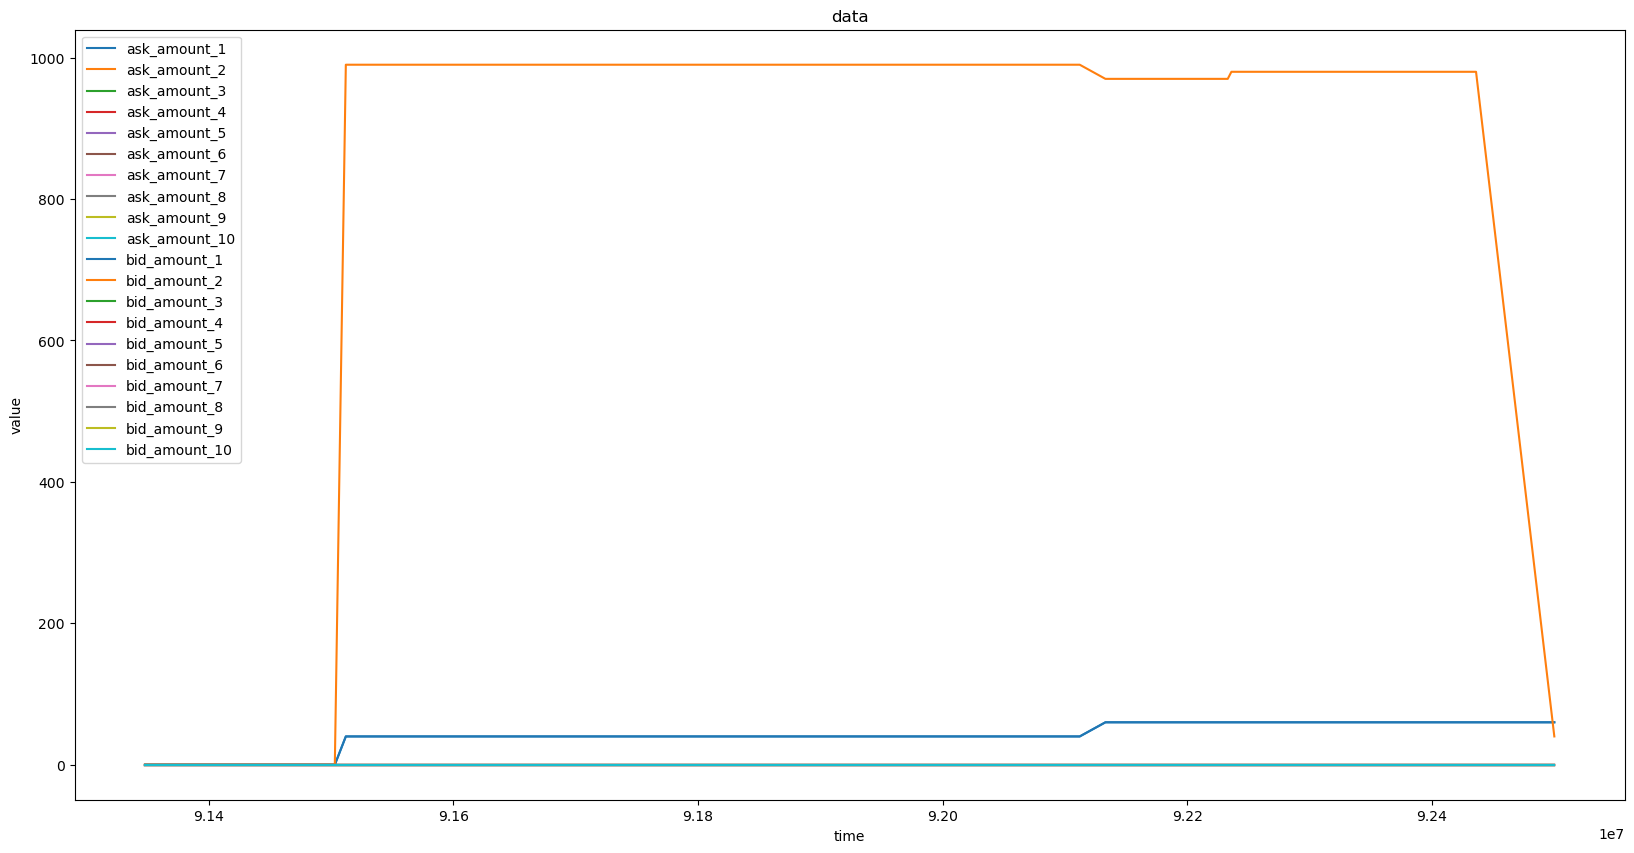

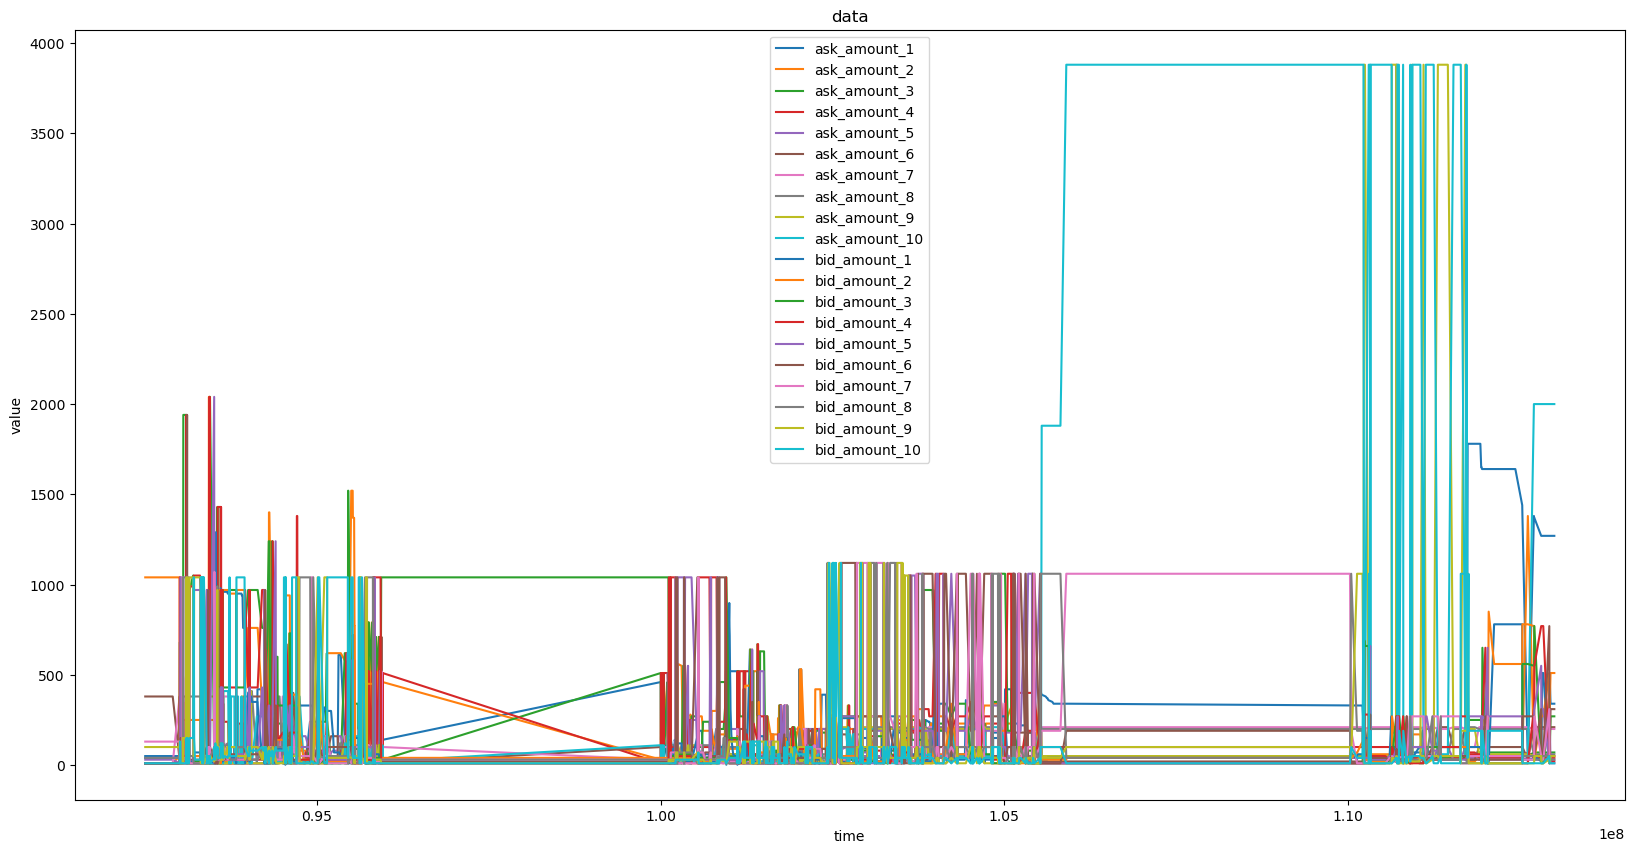

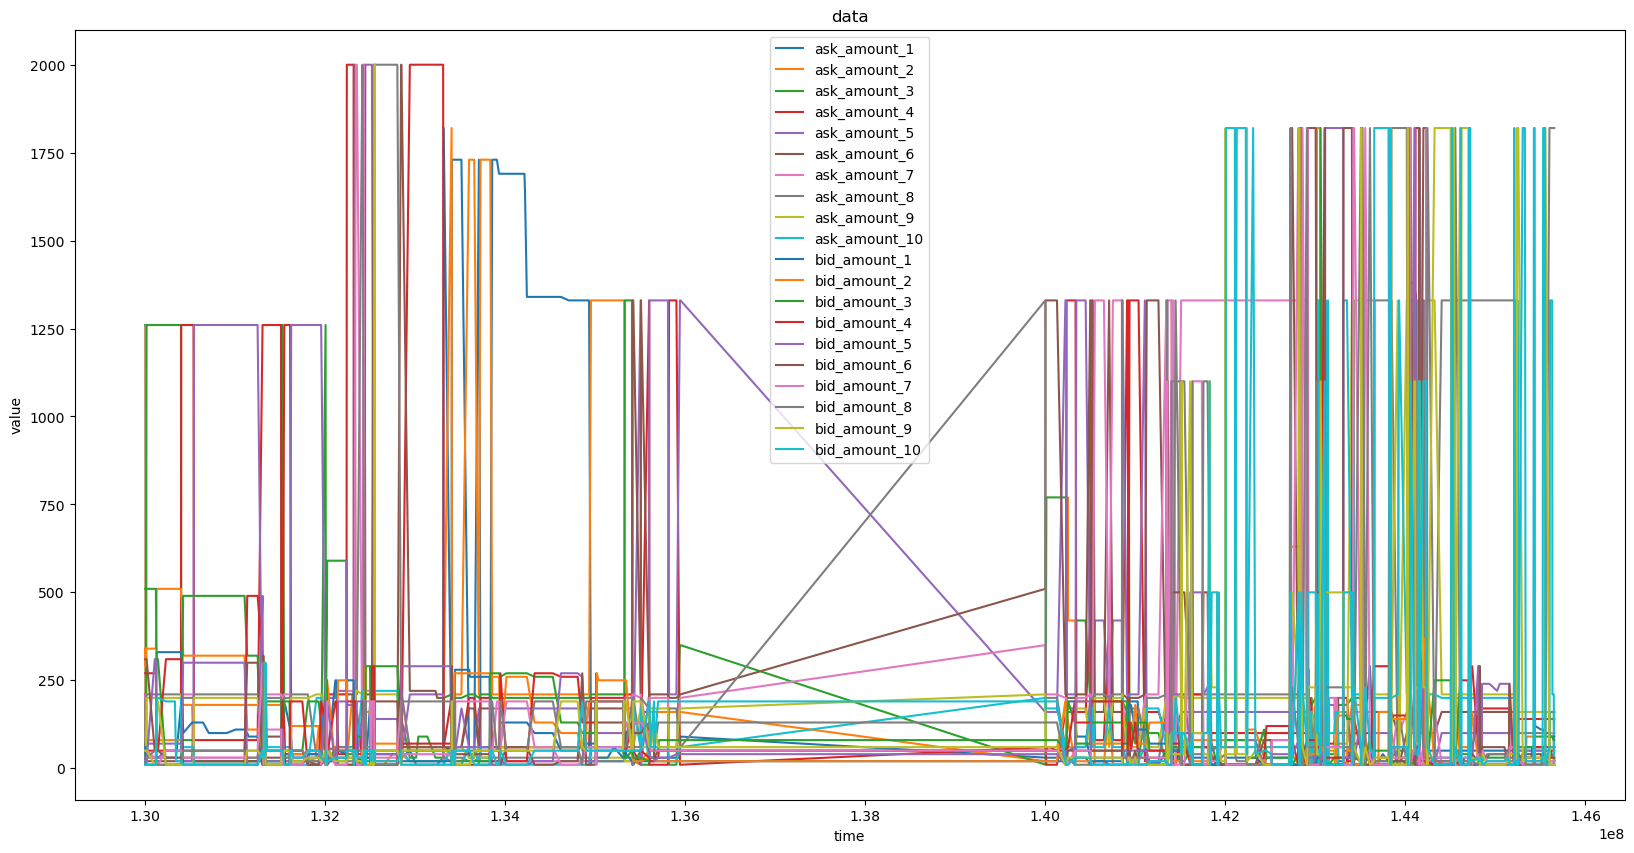

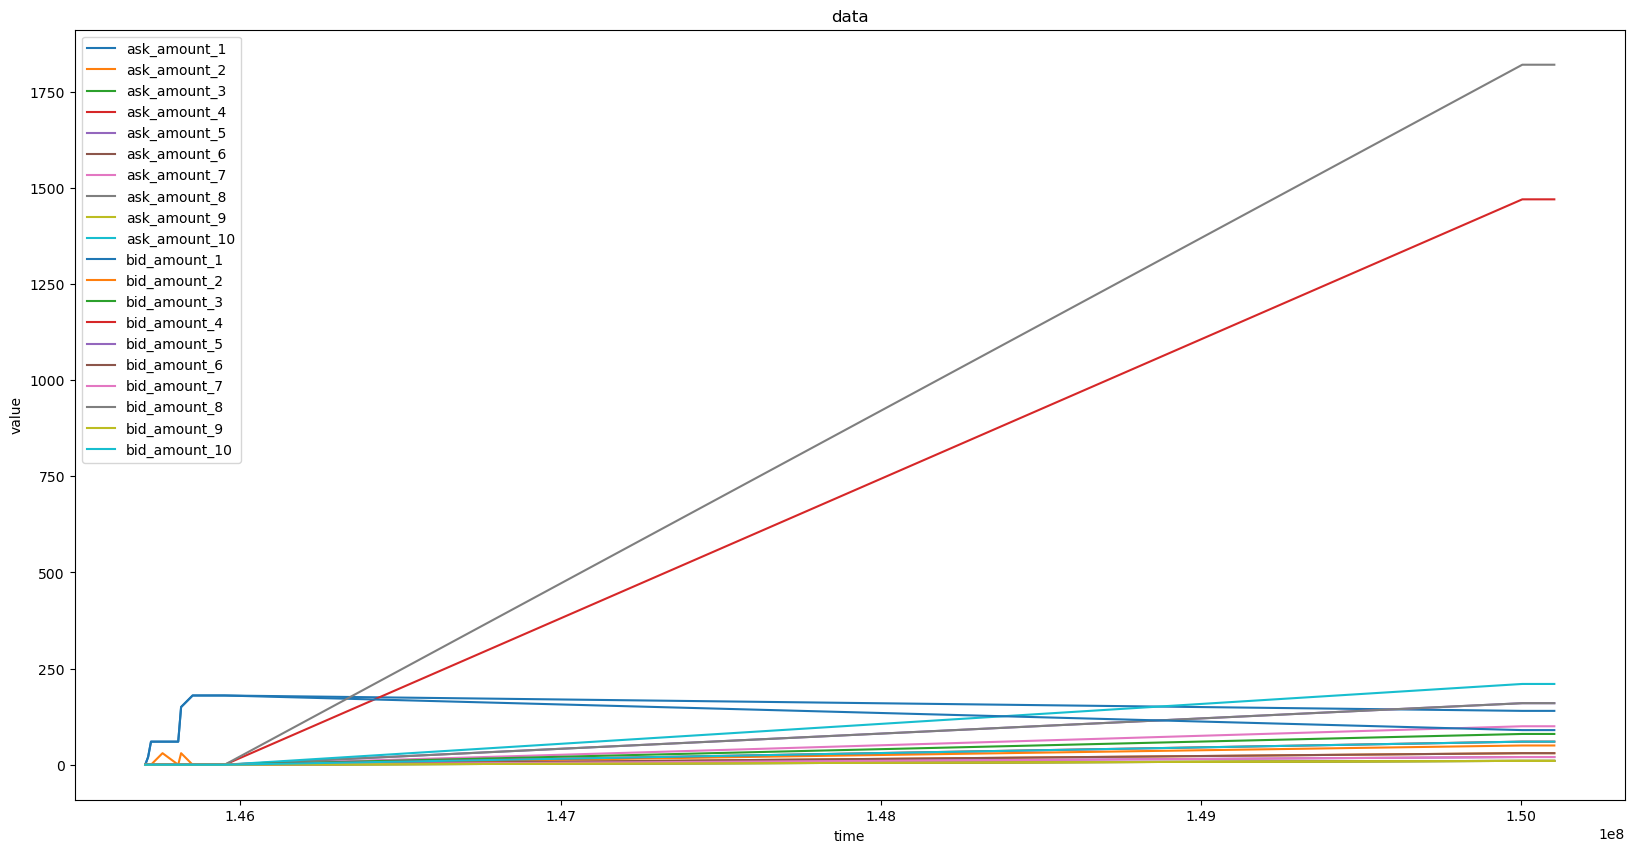

In [19]:
vis_bidask_amount(pre_ask_amount_1, pre_ask_amount_2, pre_ask_amount_3, pre_ask_amount_4, pre_ask_amount_5, pre_ask_amount_6, pre_ask_amount_7, pre_ask_amount_8, pre_ask_amount_9, pre_ask_amount_10,
                  pre_bid_amount_1, pre_bid_amount_2, pre_bid_amount_3, pre_bid_amount_4, pre_bid_amount_5, pre_bid_amount_6, pre_bid_amount_7, pre_bid_amount_8, pre_bid_amount_9, pre_bid_amount_10,
                  pre_time)
vis_bidask_amount(mor_ask_amount_1, mor_ask_amount_2, mor_ask_amount_3, mor_ask_amount_4, mor_ask_amount_5, mor_ask_amount_6, mor_ask_amount_7, mor_ask_amount_8, mor_ask_amount_9, mor_ask_amount_10,
                  mor_bid_amount_1, mor_bid_amount_2, mor_bid_amount_3, mor_bid_amount_4, mor_bid_amount_5, mor_bid_amount_6, mor_bid_amount_7, mor_bid_amount_8, mor_bid_amount_9, mor_bid_amount_10,
                  mor_time)
vis_bidask_amount(noon_ask_amount_1, noon_ask_amount_2, noon_ask_amount_3, noon_ask_amount_4, noon_ask_amount_5, noon_ask_amount_6, noon_ask_amount_7, noon_ask_amount_8, noon_ask_amount_9, noon_ask_amount_10,
                  noon_bid_amount_1, noon_bid_amount_2, noon_bid_amount_3, noon_bid_amount_4, noon_bid_amount_5, noon_bid_amount_6, noon_bid_amount_7, noon_bid_amount_8, noon_bid_amount_9, noon_bid_amount_10,
                  noon_time)
vis_bidask_amount(post_ask_amount_1, post_ask_amount_2, post_ask_amount_3, post_ask_amount_4, post_ask_amount_5, post_ask_amount_6, post_ask_amount_7, post_ask_amount_8, post_ask_amount_9, post_ask_amount_10,
                  post_bid_amount_1, post_bid_amount_2, post_bid_amount_3, post_bid_amount_4, post_bid_amount_5, post_bid_amount_6, post_bid_amount_7, post_bid_amount_8, post_bid_amount_9, post_bid_amount_10,
                  post_time)


# 数据分析

In [20]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt

In [21]:
def plt_the(bid_amount_1, ask_amount_1, time):
    host = host_subplot(111, axes_class=axisartist.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))
    par1.axis["right"].toggle(all=True)
    par2.axis["right"].toggle(all=True)

    p1, = host.plot(time, bid_amount_1, 'o-', label="bid")
    p2, = par1.plot(time, ask_amount_1, 'o-', label="ask")
    # p3, = par2.plot(time, , 'o-', label="IOU")

    # 坐标轴长度
    # host.set_xlim(0, 12)   
    # host.set_ylim(82, 84)
    # par1.set_ylim(4, 5)
    # par2.set_ylim(77, 88)

    host.set_xlabel("time")
    host.set_ylabel("bid")
    par1.set_ylabel("ask")
    #par2.set_ylabel("IOU (%)")

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    # par2.axis["right"].label.set_color(p3.get_color())

    plt.show()


In [22]:

def plt_the(bid_amount_1, bid_amount_2, bid_amount_3, time):
    host = host_subplot(111, axes_class=axisartist.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))
    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))
    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))
    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

    par1.axis["right"].toggle(all=True)
    par2.axis["right"].toggle(all=True)

    p1, = host.plot(time, bid_amount_1, 'o-', label="bid_1")
    p2, = par1.plot(time, bid_amount_2, 'o-', label="bid_2")
    p3, = par2.plot(time, bid_amount_3, 'o-', label="bid_3")

    host.set_xlabel("time")
    host.set_ylabel("bid_1")
    par1.set_ylabel("bid_2")
    par2.set_ylabel("bid_3")

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    plt.show()

# 机器学习、神经网络

In [23]:
import torch
